# measurement of events from $^{252}$Cf fission
$^{252}$Cf source activity is 74 nCi

Mar-11,2021

events collected using 
/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/CPP/BoxSi_proto2.1_event_collector

In [48]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

In [49]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/SingleAnalyzer/'

In [50]:
dT = 1000; # sec

In [53]:
# Fit a Gaussian to find the system die-away time
def dieaway_function(t,lambda_dieaway,N0):
    return N0*np.exp(-lambda_dieaway*t)

## Rossi-$\alpha$ distribution


In [62]:
time_differences_ms = pd.read_csv(data_path + 'Cf252_%dsec_time_differences.csv'%dT,)

In [63]:
dt_ms_max = 2;
dt_ms_arr = np.array(time_differences_ms['dt[ms]'])
print(len(dt_ms_arr),'time differences from %d sec.',dT)
print('np.min(dt_ms_arr):%.7f,np.max(dt_ms_arr):%.7f'%(np.min(dt_ms_arr),np.max(dt_ms_arr)))
dt_ms_arr

(167706, 'time differences from %d sec.', 1000)
np.min(dt_ms_arr):0.0000000,np.max(dt_ms_arr):9.9999655


array([6.56975631, 1.5918495 , 9.6805089 , ..., 1.231742  , 4.89690836,
       3.66516636])

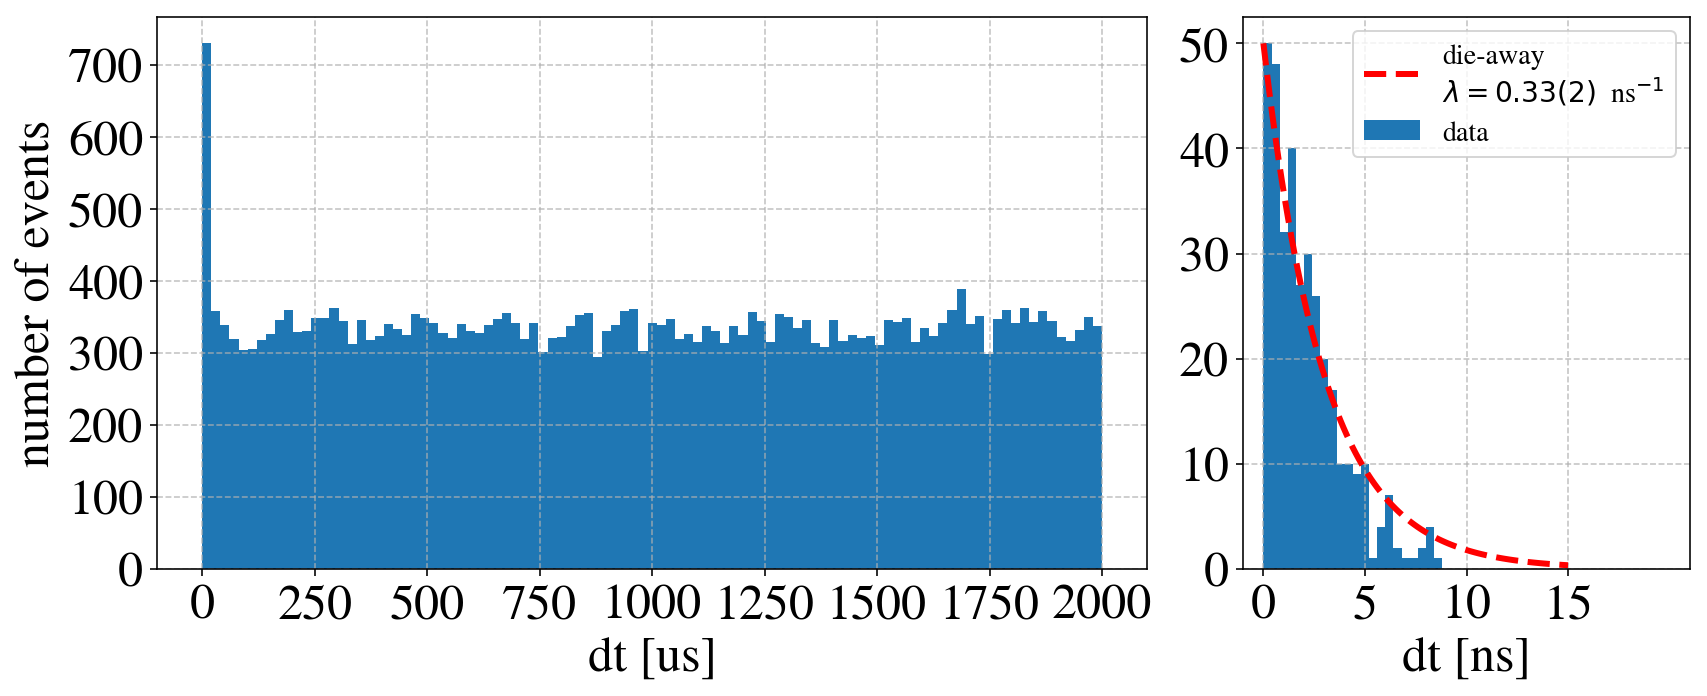

In [69]:
fig=plt.figure(figsize=(12,5));
ax=fig.add_subplot(1,3,(1,2))
plt.hist( dt_ms_arr*1e3 , bins=np.linspace(0,2000,100));
set_axes(ax,'dt [us]','number of events',do_add_grid=True)

ax=fig.add_subplot(1,3,3)
h,bins,patches=plt.hist( dt_ms_arr*1e6 , bins=np.linspace(0,20,51),label='data');

t_fit = np.linspace(0,15,100)
tau_dieaway = 3 # ns
lambda_dieaway = 1./tau_dieaway;
N0 = h[0]
plt.plot(t_fit,dieaway_function(t_fit,lambda_dieaway,N0),'--r',linewidth=3,
         label='die-away\n$\lambda=%.2f(%.0f)$  ns$^{-1}$'%(lambda_dieaway,lambda_dieaway*5))
set_axes(ax,'dt [ns]','',do_add_grid=True,
         xticks=(0,5,10,15),do_add_legend=True)
ax.legend(fontsize=14)
# ax.set_yscale('log')
plt.tight_layout()

# reproduce Rossi-alpha time difference distribution from dt array
This takes a hell-lot-of-time....

In [11]:
events = pd.read_csv(data_path + 'Cf252_%dsec_events.csv'%dT)
t = events['time[ms]']

In [27]:
dt = []
for tIdx in range(len(t)):
    dt_remaining = t[tIdx+1:tIdx+1+1000] - t[tIdx]
    dt.extend(dt_remaining)
print 'done. ',len(dt),'elements in dt'

done.  129353500 elements in dt


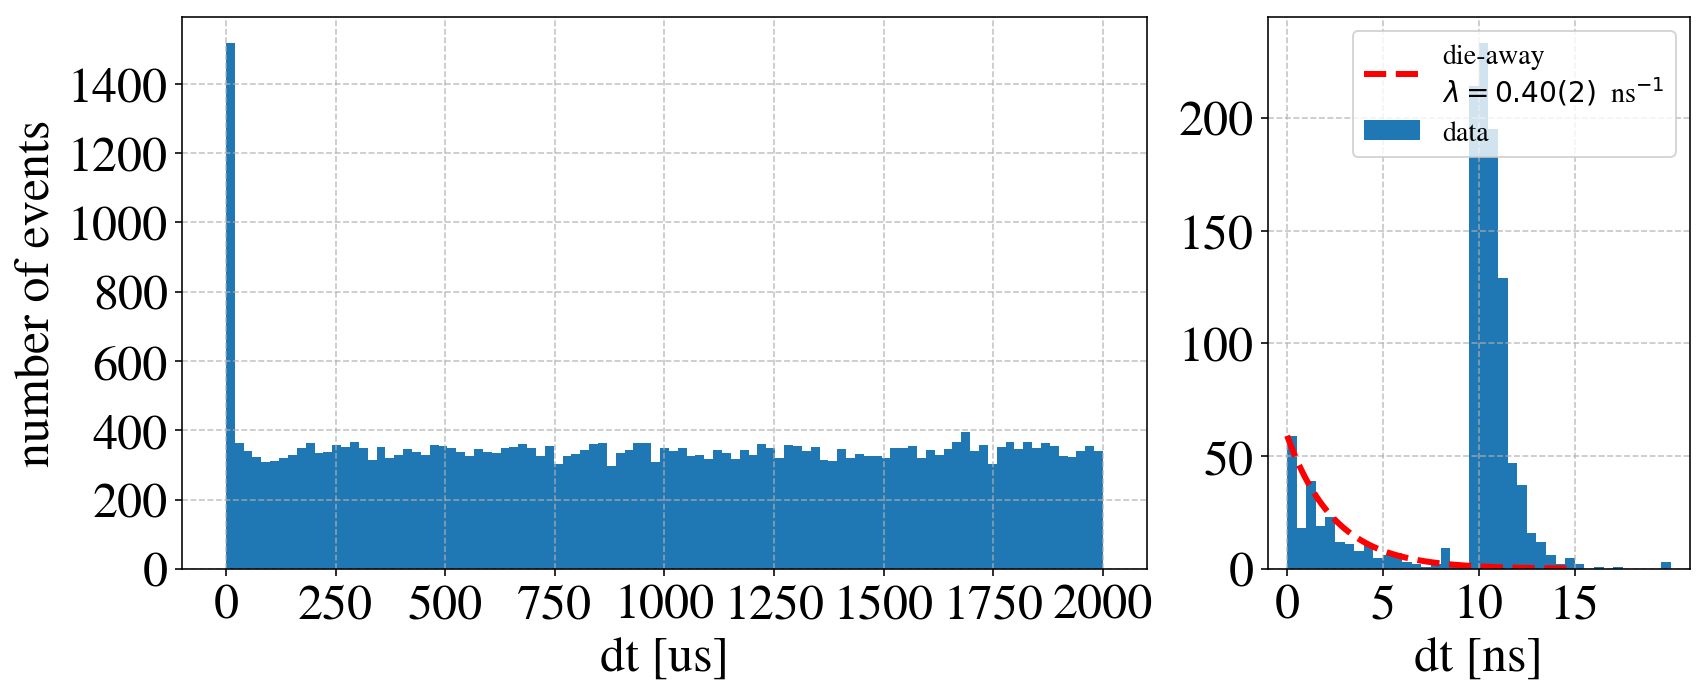

In [30]:
fig=plt.figure(figsize=(12,5));
ax=fig.add_subplot(1,3,(1,2))
plt.hist( np.array(dt)*1e3 , bins=np.linspace(0,2000,100));
set_axes(ax,'dt [us]','number of events',do_add_grid=True)

ax=fig.add_subplot(1,3,3)
h,bins,patches=plt.hist( np.array(dt)*1e6 , bins=np.linspace(0,20,41),label='data');

t_fit = np.linspace(0,15,100)
tau_dieaway = 2.5 # ns
lambda_dieaway = 1./tau_dieaway;
N0 = h[0]
plt.plot(t_fit,dieaway_function(t_fit,lambda_dieaway,N0),'--r',linewidth=3,
         label='die-away\n$\lambda=%.2f(%.0f)$  ns$^{-1}$'%(lambda_dieaway,lambda_dieaway*5))
set_axes(ax,'dt [ns]','',do_add_grid=True,
         xticks=(0,5,10,15),do_add_legend=True)
ax.legend(fontsize=14)
# ax.set_yscale('log')
plt.tight_layout()